In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

/home/fujiwara/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
plt.style.use('grayscale')
sns.set(font=['IPAPGothic'])
#plt.style.use('ggplot') 
#font = {'family' : 'meiryo'}
#matplotlib.rc('font', **font)
#matplotlib.rcParams['font.family'] = 'AppleGothic'

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


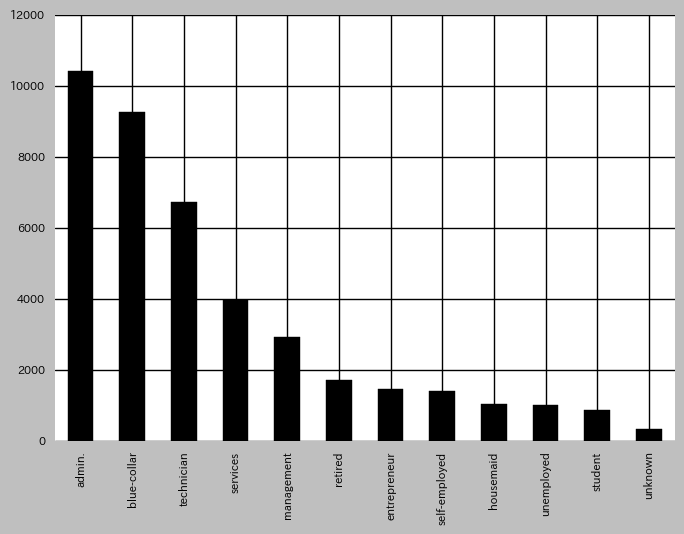

In [6]:
plt.style.use('grayscale')
c = df['job'].value_counts().plot.bar(fontsize=8)
plt.savefig('job.eps', format='eps', dpi=1000)

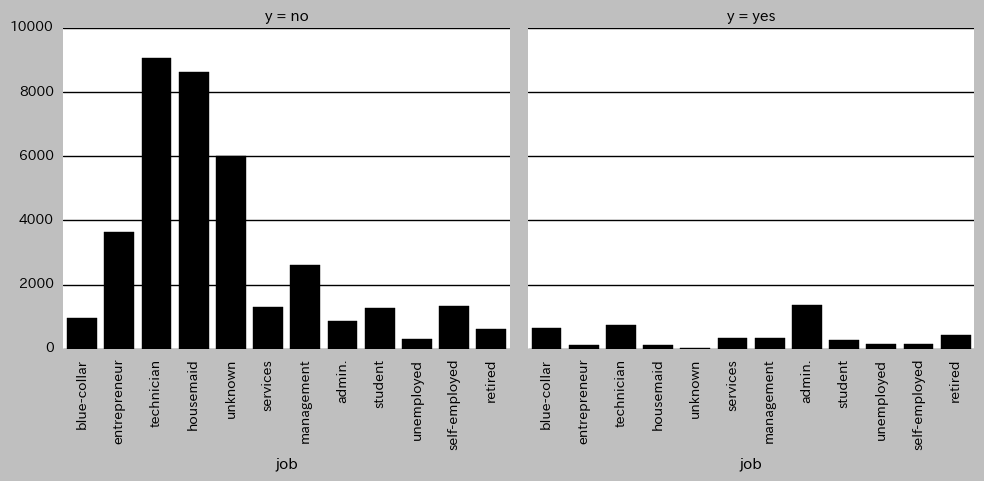

In [38]:
#fig = plt.figure(figsize=(10,5))
plt.style.use('grayscale')
g = sns.FacetGrid(df, col='y', size=5)
g.set_xticklabels(rotation=90)
sns.plt.tight_layout()
g.map(sns.countplot, 'job')
plt.savefig('job2.eps',dpi=1200)

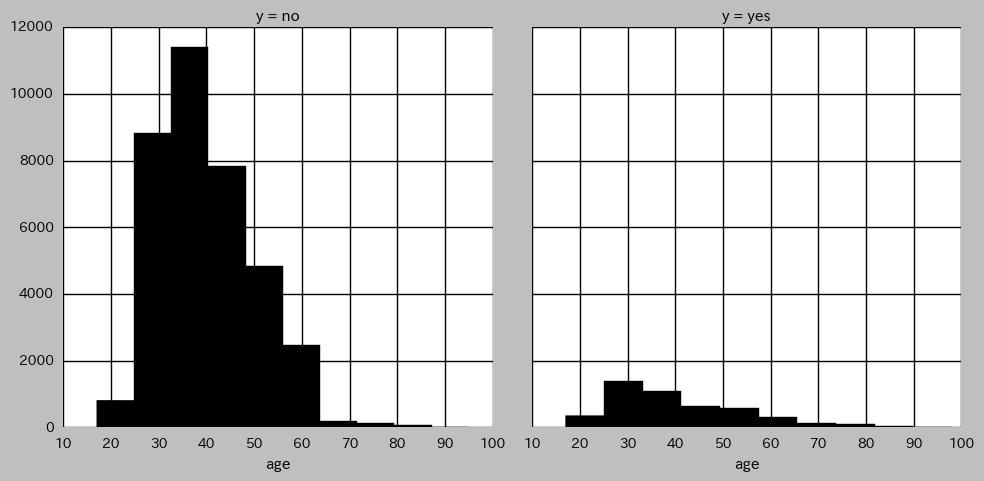

In [39]:
g = sns.FacetGrid(df, col='y', size=5)
g.map(plt.hist, 'age')
sns.plt.tight_layout()
plt.savefig('age2.eps')

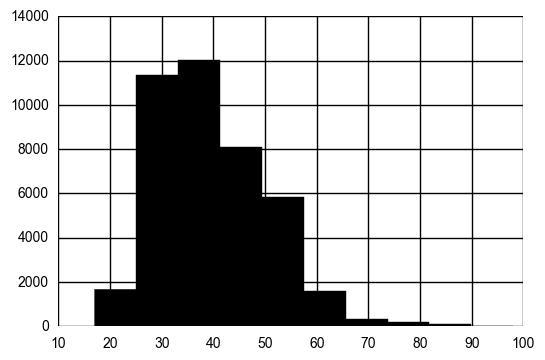

In [19]:
df['age'].hist()
plt.savefig('age.eps')

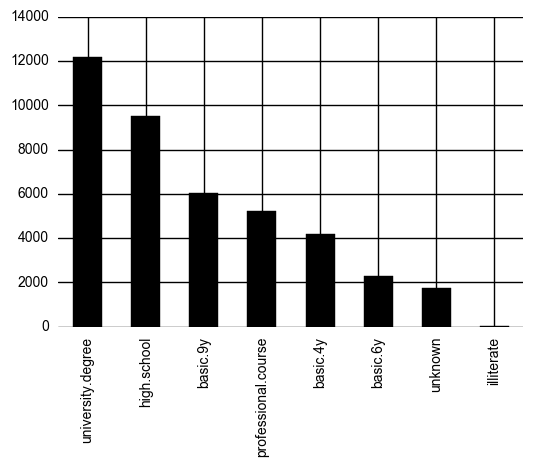

In [20]:
c = df['education'].value_counts().plot.bar()
plt.savefig('education.eps')

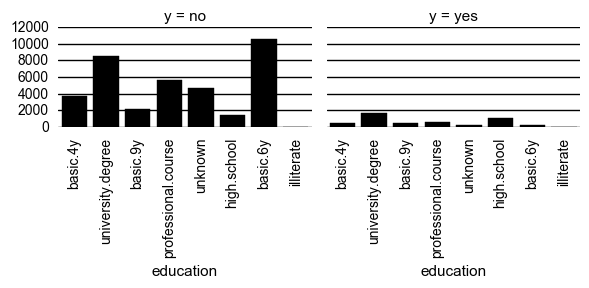

In [25]:
g = sns.FacetGrid(df, col='y')
g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'education')
plt.savefig('education2.eps')

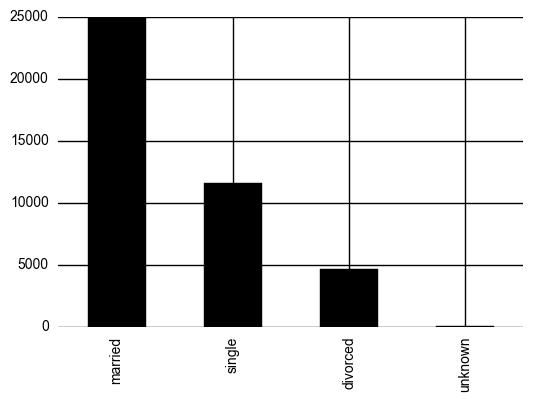

In [22]:
df['marital'].value_counts().plot.bar()
plt.savefig('maital.eps')

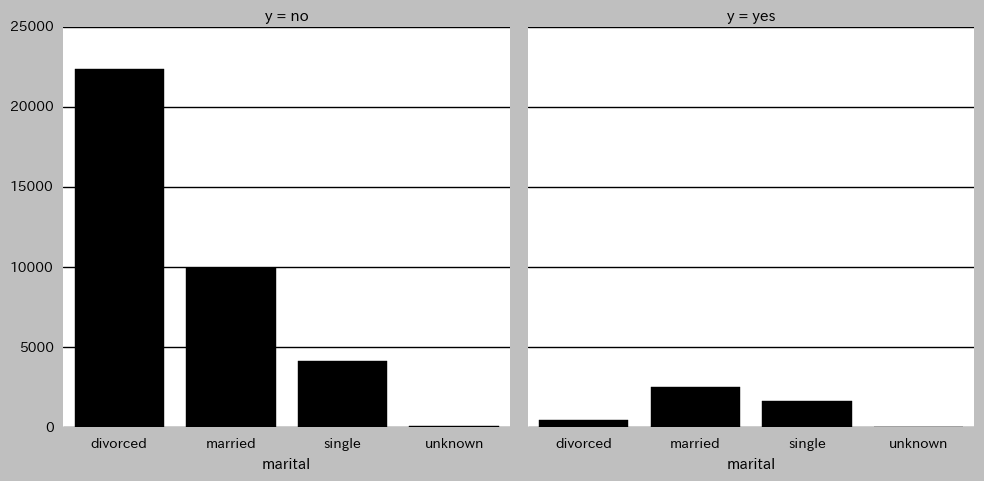

In [40]:
g = sns.FacetGrid(df, col='y', size=5)
#g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'marital')
sns.plt.tight_layout()
plt.savefig('marital2.eps')

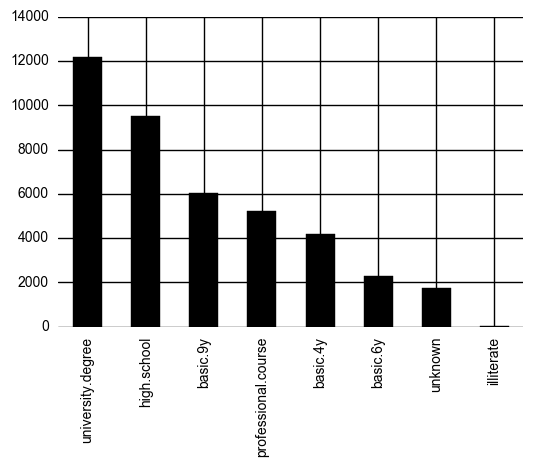

In [23]:
df['education'].value_counts().plot.bar()
plt.savefig('education.eps')

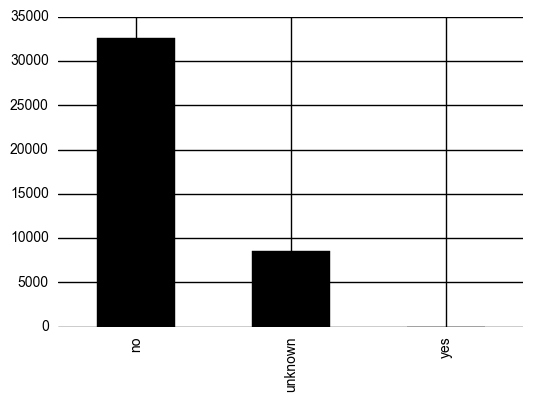

In [24]:
df['default'].value_counts().plot.bar()
plt.savefig('default.eps')

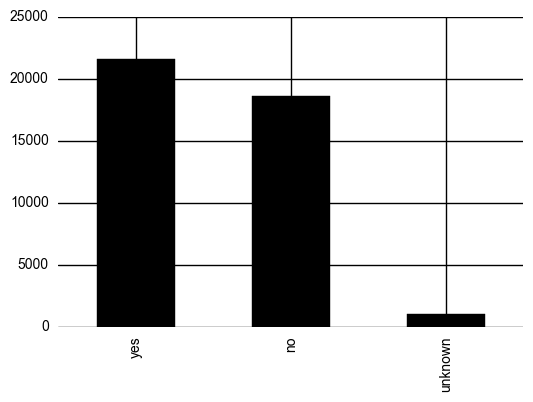

In [25]:
df['housing'].value_counts().plot.bar()
plt.savefig('housing.eps')

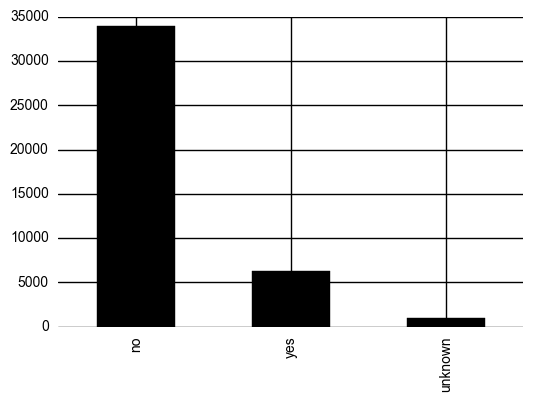

In [26]:
df['loan'].value_counts().plot.bar()
plt.savefig('loan.eps')

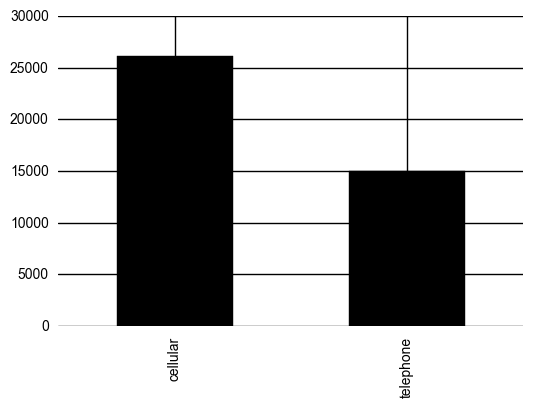

In [27]:
df['contact'].value_counts().plot.bar()
plt.savefig('contact.eps')

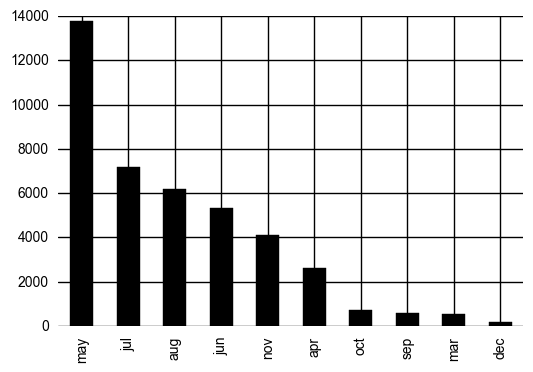

In [28]:
df['month'].value_counts().plot.bar()
plt.savefig('month.eps')

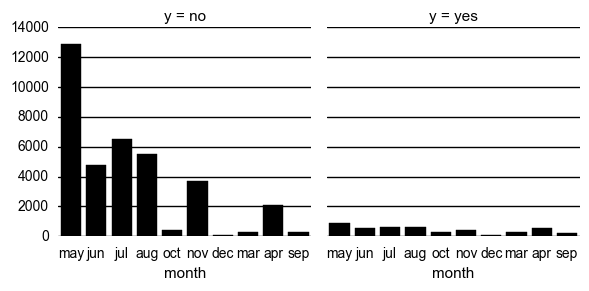

In [34]:
g = sns.FacetGrid(df, col='y')
#g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'month')
plt.savefig('month2.eps')

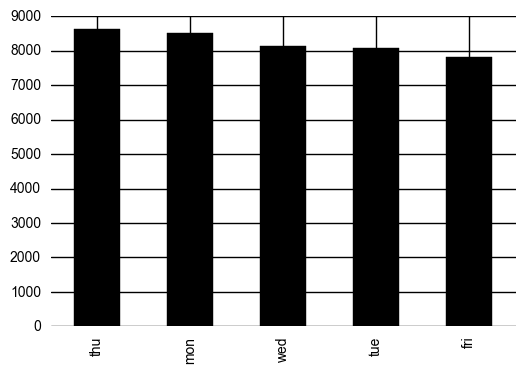

In [29]:
df['day_of_week'].value_counts().plot.bar()
plt.savefig('dayofweek.eps')

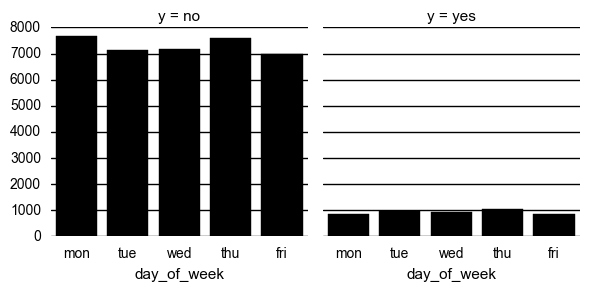

In [33]:
g = sns.FacetGrid(df, col='y')
#g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'day_of_week')
plt.savefig('dayofweek2.eps')

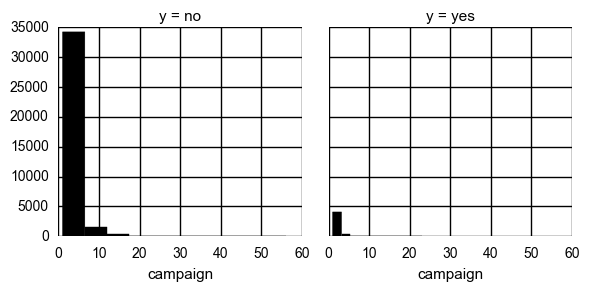

In [24]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'campaign')
plt.savefig('campaign2.eps')

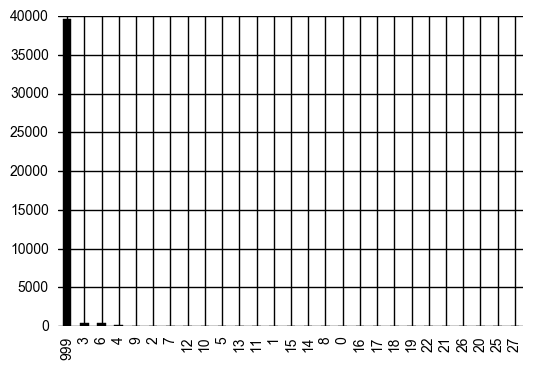

In [31]:
df['pdays'].value_counts().plot.bar()
plt.savefig('pdays.eps')

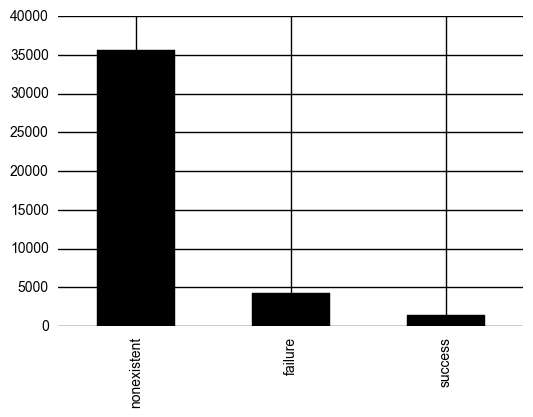

In [32]:
df['poutcome'].value_counts().plot.bar()
plt.savefig('poutcome.eps')

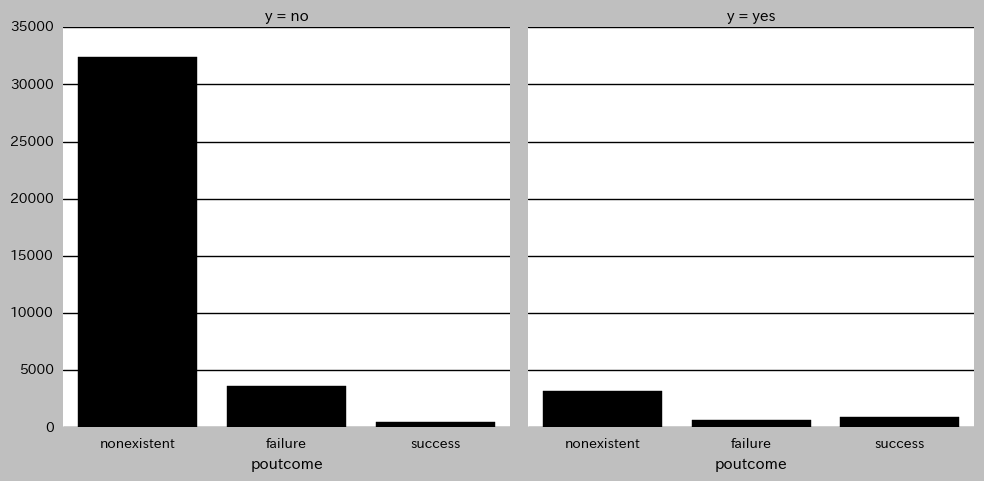

In [41]:
g = sns.FacetGrid(df, col='y', size=5)
#g.set_xticklabels(rotation=90, size=8)
g.map(sns.countplot, 'poutcome')
sns.plt.tight_layout()
plt.savefig('poutcome2.eps')

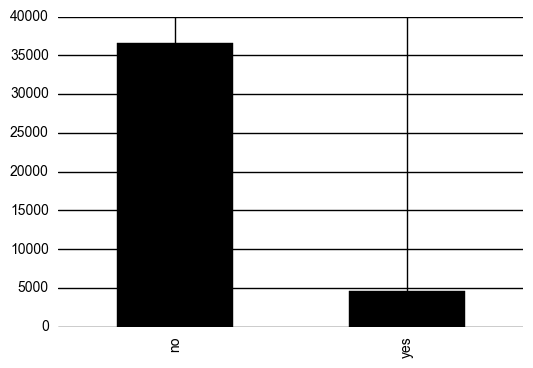

In [33]:
df['y'].value_counts().plot.bar()
plt.savefig('y.eps')

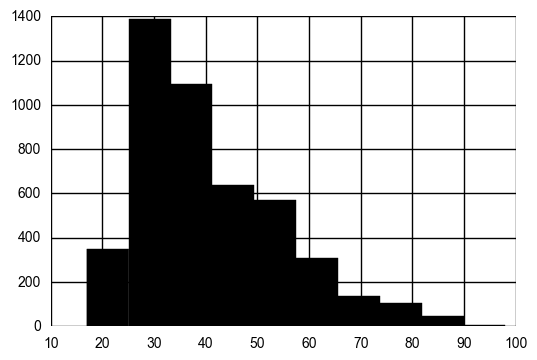

In [34]:
df[df['y']=='yes']['age'].hist()
plt.savefig('age_y.eps')

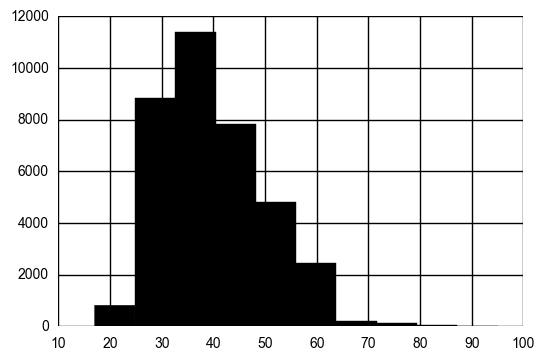

In [35]:
df[df['y']=='no']['age'].hist()
plt.savefig('age_n.eps')

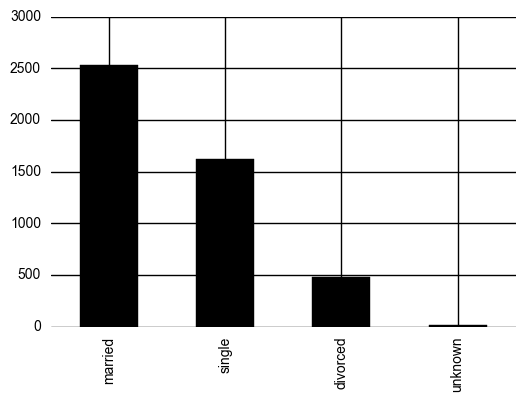

In [36]:
df[df['y']=='yes']['marital'].value_counts().plot.bar()
plt.savefig('marital_y.eps')

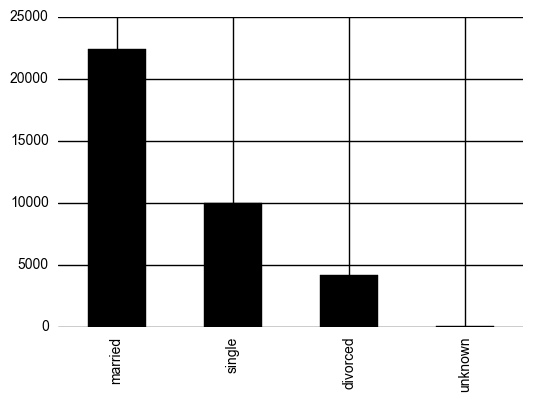

In [37]:
df[df['y']=='no']['marital'].value_counts().plot.bar()
plt.savefig('marital_n.eps')

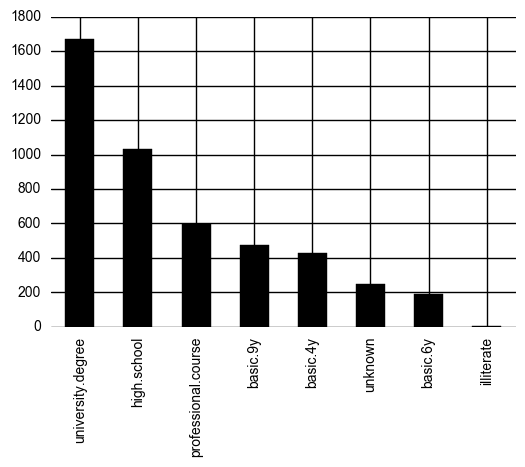

In [38]:
df[df['y']=='yes']['education'].value_counts().plot.bar()
plt.savefig('education_y.eps')

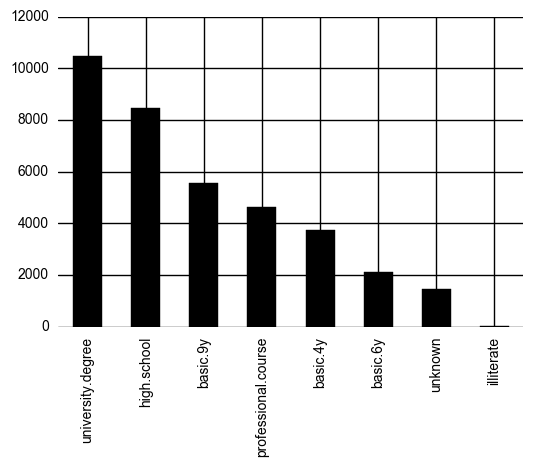

In [39]:
df[df['y']=='no']['education'].value_counts().plot.bar()
plt.savefig('education_n.eps')

In [16]:
data = pd.get_dummies(df[['job', 'marital', 'education','contact', 'month', 'day_of_week','previous']], drop_first = True)

In [17]:
binary_columns = ['default', 'housing', 'loan']
binary_convertor ={"no":-1,"yes":1,"unknown":0}
y_convertor ={"no":0,"yes":1}

In [18]:
data['default'] = df['default'].map(binary_convertor)
data['housing'] = df['housing'].map(binary_convertor)
data['loan'] = df['loan'].map(binary_convertor)
data['y'] = df['y'].map(y_convertor)

In [19]:
data.shape

(41188, 40)

In [20]:
# define columns for standardize
std_columns =['age', 'campaign','previous','cons.conf.idx', 'cons.price.idx', 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays']

# standardize data
stdc = StandardScaler()
df_std = pd.DataFrame(stdc.fit_transform(df[std_columns]), columns=std_columns, index=df.index)
for c in std_columns:
    data[c] = df_std[c]

In [21]:
data.shape

(41188, 49)

split data

In [22]:
X, Y = data.drop('y', axis=1).values, data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

data_train = pd.DataFrame(X_train, columns= data.columns.drop('y'))
data_train['y'] = Y_train

data_test = pd.DataFrame(X_test, columns= data.columns.drop('y'))
data_test['y'] = Y_test

In [23]:
data_test.shape

(12357, 49)

In [24]:
data_train.shape

(28831, 49)

In [25]:
sum(data_test['y'])

1360

In [26]:
sum(data_train['y'])

3280

In [23]:
data_test.to_hdf('db.h5', key='test')
data_train.to_hdf('db.h5', key='train')

In [13]:
data.to_csv('data.csv',index=None)

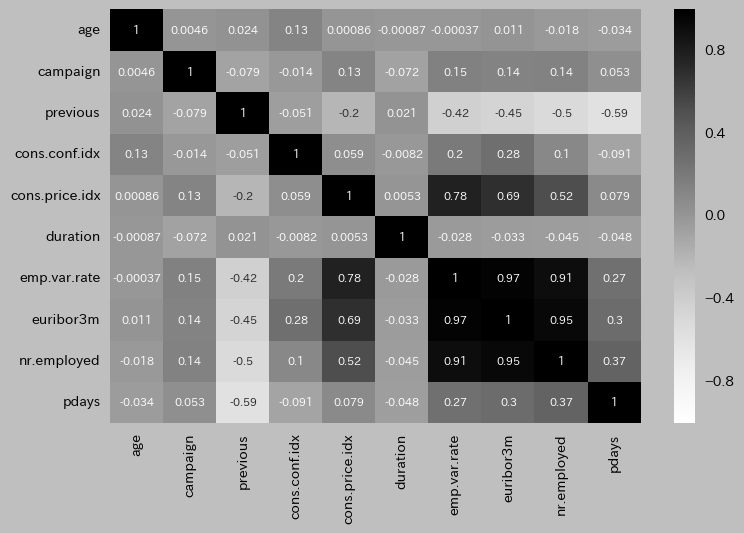

In [37]:
sns.heatmap(data[std_columns].corr(), cmap='Greys', annot=True, annot_kws={"size": 8})
sns.plt.tight_layout()
sns.plt.savefig('corr.eps')
sns.plt.show()

In [25]:
z = std_columns.append('y')
#data[z].corr()
std_columns.append('y')

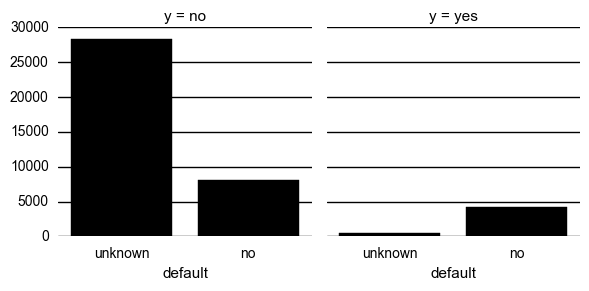

In [31]:
g = sns.FacetGrid(df, col='y')
#g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'default')
plt.savefig('default2.eps')

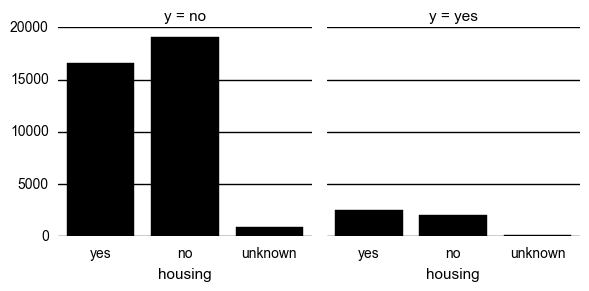

In [30]:
g = sns.FacetGrid(df, col='y')
#g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'housing')
plt.savefig('housing2.eps')

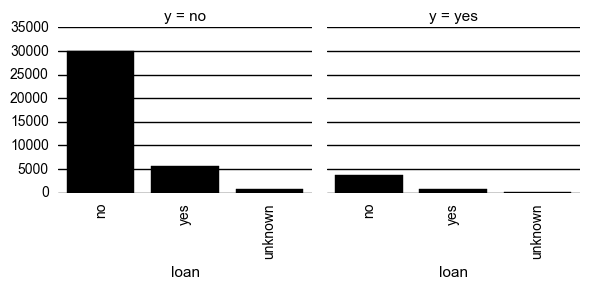

In [28]:
g = sns.FacetGrid(df, col='y')
g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'loan')
plt.savefig('loan2.eps')

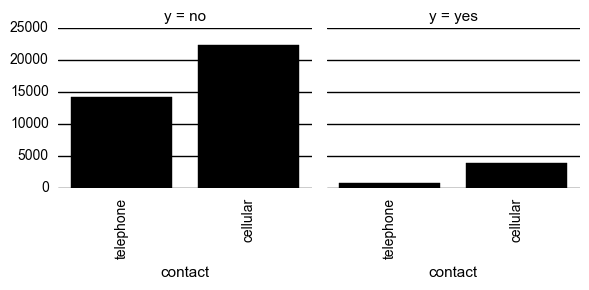

In [29]:
g = sns.FacetGrid(df, col='y')
g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'contact')
plt.savefig('contact2.eps')

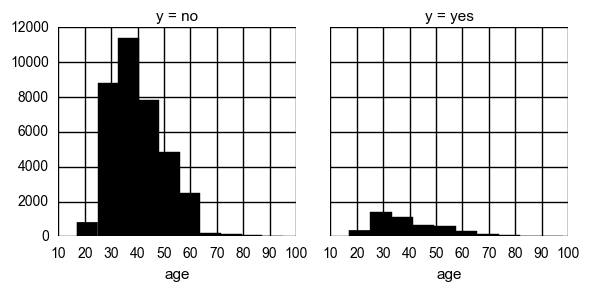

In [36]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'age')
plt.savefig('age2.eps')

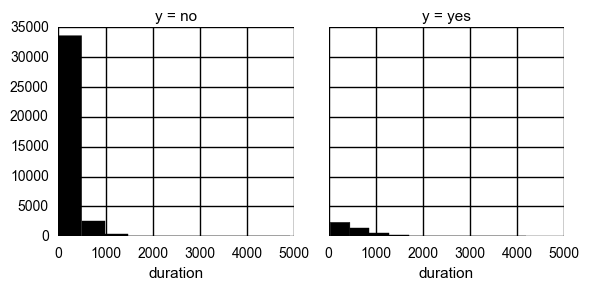

In [37]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'duration')
plt.savefig('duration2.eps')

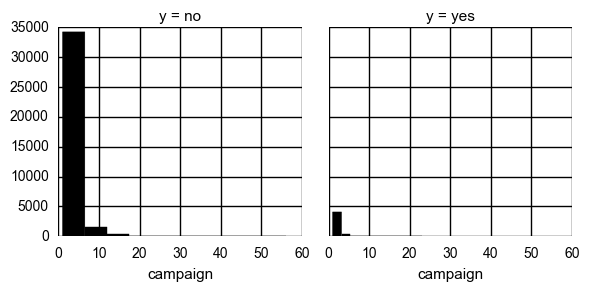

In [38]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'campaign')
plt.savefig('campaign2.eps')

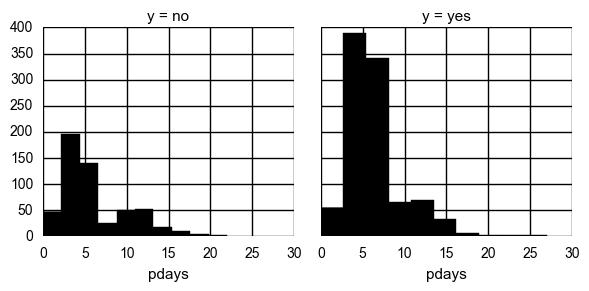

In [40]:
g = sns.FacetGrid(df[df['pdays'] != 999], col='y')
g.map(plt.hist, 'pdays')
plt.savefig('pdays2.eps')

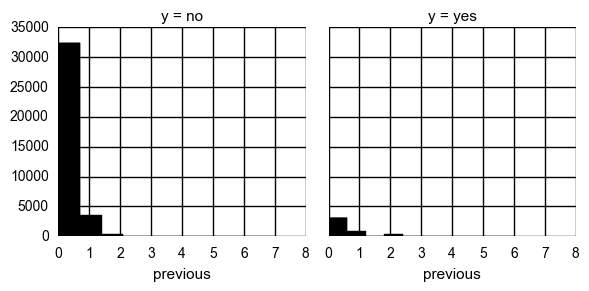

In [41]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'previous')
plt.savefig('previous2.eps')

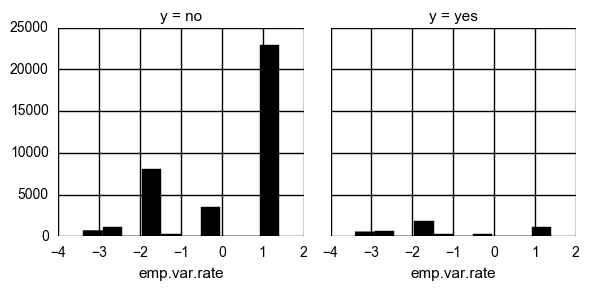

In [42]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'emp.var.rate')
plt.savefig('empvarrate2.eps')

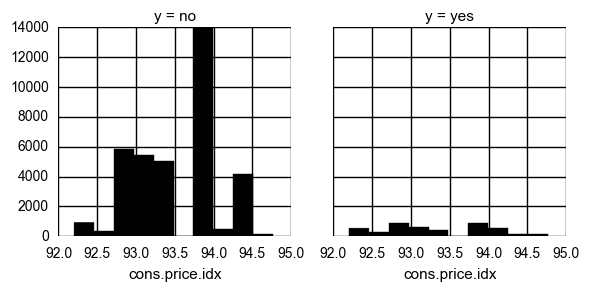

In [43]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'cons.price.idx')
plt.savefig('conspriceidx2.eps')

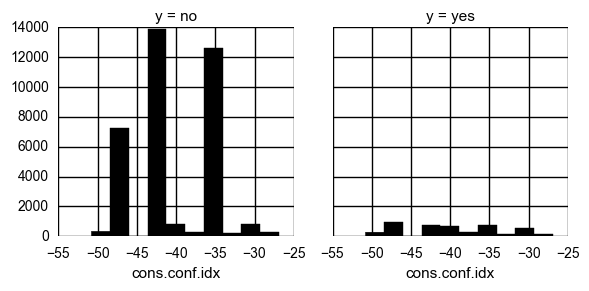

In [44]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'cons.conf.idx')
plt.savefig('consconfidx2.eps')

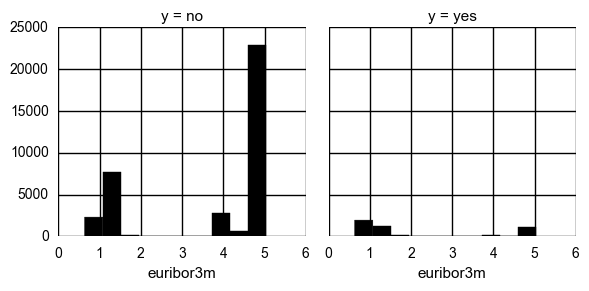

In [45]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'euribor3m')
plt.savefig('euribor3m2.eps')

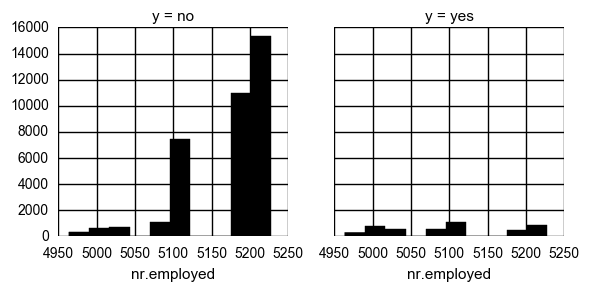

In [46]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'nr.employed')
plt.savefig('nremployed2.eps')